# 1 Data Cleaning / Preprocessing for EDA
**Loading, cleaning and rearranging of data for EDA process**

## 1.1 Loading Data
**Data is loaded into python as dataframe object.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import mannwhitneyu

from statsmodels.stats.diagnostic import lilliefors

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

from pmdarima.arima import auto_arima

In [ ]:
# loading data
# FILE ='data.csv'
FILE = './World Bank Dataset/API_USA_DS2_en_csv_v2_3471341.csv'

df_original =pd.read_csv(FILE,skiprows=4,header=0)

df_original

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,United States,USA,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,USA,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R2.ZS,0.866813,0.968558,1.272206,1.306122,1.061018,0.763476,...,1.831105e+00,1.833245e+00,1.717897e+00,1.312902e+00,1.335903e+00,1.363995e+00,1.331849e+00,1.320032e+00,NaN,NaN
2,United States,USA,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.468085e+01,9.534050e+01,9.586957e+01,1.000000e+02,1.000835e+02,9.959449e+01,9.984264e+01,1.003187e+02,NaN,NaN
3,United States,USA,Merchandise imports from high-income economies...,TM.VAL.MRCH.HI.ZS,60.784629,61.907031,63.857581,64.824298,65.680703,68.552213,...,5.002163e+01,5.030859e+01,5.066916e+01,4.967514e+01,4.927211e+01,4.845318e+01,4.872772e+01,5.067654e+01,NaN,NaN
4,United States,USA,Share of tariff lines with international peaks...,TM.TAX.TCOM.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.019866e+01,1.033102e+01,1.066085e+01,1.016535e+01,1.013118e+01,1.068281e+01,9.839166e+00,1.060377e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,United States,USA,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.500813e+11,1.743627e+11,1.768006e+11,1.903835e+11,2.035582e+11,1.982609e+11,2.081318e+11,2.193376e+11,NaN,NaN
1439,United States,USA,Imports of goods and services (current US$),NE.IMP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.769317e+12,2.766375e+12,2.887445e+12,2.794850e+12,2.738359e+12,2.923691e+12,3.129697e+12,3.115990e+12,2.774597e+12,NaN
1440,United States,USA,"Gross fixed capital formation, private sector ...",NE.GDI.FPRV.ZS,15.313823,14.841115,15.022310,15.299092,15.645961,16.189324,...,1.530653e+01,1.577613e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441,United States,USA,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.309549e-01,8.584877e-01,2.072001e+00,2.978334e+00,2.370201e+00,2.008441e+00,2.598223e+00,2.162651e+00,-2.788095e+00,NaN


In [ ]:
# saving to local file to show in dashboard later
df_original.to_csv('./misc/df_original.csv')

## 1.2 Initial Data Inspection
**Finding initial data cleaning requirements to obtain a dataframe in the appropriate format for the project.**

Inspecting the data in its original format as a dataframe yielded the following observations:
* Years are columns and features are rows
* Presence of many NaN values
* 'Country Name' and 'Country Code' Column redundant columns for this project
* May exist more redudant columns


## 1.3 Initial Data Cleaning
**Data is manipulated and cleaned so that it can be converted into dataframes in an useful format.**  

Goals:
* Transpose data to have features as columns, years as observations
* Dropping of redundant columns such as 'Country Name' and 'Country Code'
* Identification of target column(s)
* Removal of any obvious redundant data

In [ ]:
"""Dropping of redundant columns"""
# dropping redudant columns
df_original.drop(['Country Name', 'Country Code'],axis=1,inplace=True)

In [ ]:
"""Transposing data to have years as obsevations, indicator names as features"""
df_transposed = df_original.transpose()
df_transposed = df_transposed.iloc[2:,:]
# index was the year, convert to column 
df_transposed.reset_index(level=0, inplace=True) 

# Getting feature names and count
features_list=list(df_original['Indicator Name'])


#Adding back the column names
column_names = ['Year'] + features_list
df_transposed.columns = column_names

In [ ]:
"""Identification of target column and rearrangement, also redundant column drops"""

# finding column names with life expectancy
targets_list=[]
for i in features_list:
    if 'expectancy' in i:
        targets_list.append(i)
    else:
        None

# dropping male and female life expectancies as only total is needed
df_transposed.drop(targets_list[0],axis=1,inplace=True)
df_transposed.drop(targets_list[2],axis=1,inplace=True)

# popping life expectancy from the dataframe
target_column =df_transposed.pop(targets_list[1])

# adding life expectancy to the end of dataframe
df_list =[df_transposed,target_column]
df_cleaned =pd.concat(df_list,axis=1)

In [ ]:
df_cleaned

,Year,"Internally displaced persons, new displacement associated with conflict and violence (number of cases)",Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Net barter terms of trade index (2000 = 100),Merchandise imports from high-income economies (% of total merchandise imports),"Share of tariff lines with international peaks, primary products (%)","Share of tariff lines with international peaks, manufactured products (%)",Urban population (% of total population),"Population, total","Population ages 65 and above, male (% of male population)",...,Discrepancy in expenditure estimate of GDP (current LCU),Adjusted net national income (current US$),Adjusted savings: carbon dioxide damage (current US$),"Industry (including construction), value added (% of GDP)","Agriculture, forestry, and fishing, value added (constant LCU)",Imports of goods and services (current US$),"Gross fixed capital formation, private sector (% of GDP)",Final consumption expenditure (annual % growth),General government final consumption expenditure (constant LCU),"Life expectancy at birth, total (years)"
0,1960,NaN,0.866813,NaN,60.784629,NaN,NaN,69.996,180671000.0,8.199856,...,NaN,NaN,NaN,NaN,NaN,NaN,15.313823,NaN,NaN,69.770732
1,1961,NaN,0.968558,NaN,61.907031,NaN,NaN,70.377,183691000.0,8.225849,...,NaN,NaN,NaN,NaN,NaN,NaN,14.841115,NaN,NaN,70.270732
2,1962,NaN,1.272206,NaN,63.857581,NaN,NaN,70.757,186538000.0,8.233387,...,NaN,NaN,NaN,NaN,NaN,NaN,15.02231,NaN,NaN,70.119512
3,1963,NaN,1.306122,NaN,64.824298,NaN,NaN,71.134,189242000.0,8.232538,...,NaN,NaN,NaN,NaN,NaN,NaN,15.299092,NaN,NaN,69.917073
4,1964,NaN,1.061018,NaN,65.680703,NaN,NaN,71.508,191889000.0,8.231044,...,NaN,NaN,NaN,NaN,NaN,NaN,15.645961,NaN,NaN,70.165854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,NaN,1.363995,99.594485,48.453183,10.68281,4.948077,82.058,325122128.0,13.877865,...,63357183000.0,16683269906127.599609,186325837673.885986,18.251405,198260881000.0,2923691000000.0,NaN,2.008441,2657840670000.0,78.539024
58,2018,NaN,1.331849,99.842644,48.727716,9.839166,4.592044,82.256,326838199.0,14.265177,...,84701934000.0,17499031830396.900391,195179115282.115997,18.527823,208131806000.0,3129697000000.0,NaN,2.598223,2689015528000.0,78.639024
59,2019,NaN,1.320032,100.318725,50.676541,10.60377,4.753657,82.459,328329953.0,14.661241,...,60641697000.0,18195844536841.101562,201951882722.140015,18.156371,219337555000.0,3115990000000.0,NaN,2.162651,2743653855000.0,78.787805
60,2020,NaN,NaN,NaN,NaN,NaN,NaN,82.664,329484123.0,15.071486,...,1000000.0,NaN,NaN,NaN,NaN,2774597000000.0,NaN,-2.788095,2799231853000.0,NaN


In [ ]:
# saving to local file to show in dashboard later
df_cleaned.to_csv('./misc/df_cleaned.csv',index=False)

## 1.4 Dealing with redundancy and missing values

### 1.4.1 Identify columns that contain a single value

In [ ]:
# dataset sha pe before removing redundant columns
print('Dataset shape BEFORE removing columns that contain a single value or less:')
print(df_cleaned.shape)

# getting number of unique values for each column
counts = df_cleaned.nunique()

# recording columns to delete
to_del = [i for i,v in enumerate(counts) if v <= 1]

# dropping redundant columns
df_cleaned.drop(df_cleaned.columns[to_del], axis=1, inplace=True)

print('Dataset shape AFTER removing columns that contain a single value or less:')
print(df_cleaned.shape)

Dataset shape BEFORE removing columns that contain a single value or less:
(62, 1442)
Dataset shape AFTER removing columns that contain a single value or less:
(62, 1018)


In [ ]:
# creating years series for ARIMA process for later

Year_Series = df_cleaned['Year']

# dropping 2021
Year_Series.drop(Year_Series.tail(1).index,inplace=True)
#Saving an instance with 2020
Year_Series_2020 = Year_Series.copy()
# dropping 2020
Year_Series.drop(Year_Series.tail(1).index,inplace=True)

### 1.4.2  Removing any duplicating columns

In [ ]:
dups = df_cleaned.duplicated()
print(dups.any())
df_cleaned[dups]

#removing the column 'Year' as it's not a feature.
df_cleaned.drop(['Year'],axis=1,inplace=True)

False


### 1.4.3 Dropping columns with more than 40% of the total number of values missing

In [ ]:
threshold = int(len(df_cleaned) * 0.4)

count = 0

cols_to_drop = []

for i in range(df_cleaned.shape[1]):
    if df_cleaned.iloc[:,i].isna().sum() > threshold:
        cols_to_drop.append(df_cleaned.iloc[:,i].name)
        count += 1
        
print('Shape of dataset before dropping columns with more than 40% missing values:', df_cleaned.shape)
print('Number of columns with more than 40% missing values:', count)

df_cleaned.drop(cols_to_drop, axis=1, inplace=True)

print('Shape of dataset after dropping columns with more than 40% missing values:', df_cleaned.shape)


Shape of dataset before dropping columns with more than 40% missing values: (62, 1017)
Number of columns with more than 40% missing values: 519
Shape of dataset after dropping columns with more than 40% missing values: (62, 498)


## 1.5 Preprocessing for EDA Summary
**Result**:
1. Data transposed to have years as observations and all economical, social and medical factors as features
2. Identifcation of average life expectancy target column
3. Identification of features
4. Removal of obvious redundant columns such as country name, country code and life expectancy for females and males separately
5. Rearranging of dataframe to conventional format e.g moving target column to end of the dataframe
6. Removal of duplicating columns
7. Removal of columns with more than 40% of the total number of values missing
8. Features preserved: 498 / 1441

In [ ]:
print('Dataframe dimension before EDA preprocessing:',df_transposed.shape,'\nDataframe dimension after EDA preprocessing:',df_cleaned.shape)

Dataframe dimension before EDA preprocessing: (62, 1441) 
Dataframe dimension after EDA preprocessing: (62, 498)


# 2 Initial EDA
**Initial exploratory data analysis to:**  
1. Getting a sense of the data
2. Determining the data architecture
3. Getting a sense of data distribution
4. Finding initial data trends
5. Finding requirements for preprocessing for machine learning algorithms such as imputation
6. Further data manipulation to reduce redundancy and dimensions

## 2.1 Recast Data type for EDA/Machine Learning Tasks
* From data source, all of the features are numerical features 
* However the dataframe itself has wrongly assigned values as string representations
* Therefore recast is needed to allow imputation, pca and to observe correlations between features


In [ ]:
#Recasting dataframe to numerical data 
df_cleaned = df_cleaned.apply(pd.to_numeric)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 498 entries, Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports) to Life expectancy at birth, total (years)
dtypes: float64(498)
memory usage: 241.3 KB


## 2.2 Exploring Life Expectancy
- The life expectancy for 2020 and 2021 are NaN values. As a result, the entire instance for 2021 is dropped and 2020 is replaced with the CDC's life expectancy value.

In [ ]:
#Exploring the target variable, Life Expectancy
df_cleaned['Life expectancy at birth, total (years)'].tail(2)

60   NaN
61   NaN
Name: Life expectancy at birth, total (years), dtype: float64

In [ ]:
df_cleaned.drop(df_cleaned.tail(1).index,inplace=True)
df_cleaned.loc[60, 'Life expectancy at birth, total (years)'] = 77.0

## 2.3 Population Based Features
- There are 57 features based on descriptive population statistics. This accounts for total population and male and female population in different age categories. Plots are created to see how correlation varies against the target variable. The end result was to keep these features due to literature review.

In [ ]:
#2 DataFrames are created to append population features too
PopulationDF1 = pd.DataFrame(df_cleaned['Life expectancy at birth, total (years)'])
PopulationDF2 = pd.DataFrame(df_cleaned['Life expectancy at birth, total (years)'])

In [ ]:
# including breakdown of population statistics. For example, Male and Female in different age categories
for i in df_cleaned.columns:
    if 'Population ages' in i:
        PopulationDF1[i] = df_cleaned[i]
# including total population statistics
for i in df_cleaned.columns:
    if 'Population,' in i:
        PopulationDF2[i]=df_cleaned[i]

In [ ]:
PopulationDF1.columns

Index(['Life expectancy at birth, total (years)',
       'Population ages 65 and above, male (% of male population)',
       'Population ages 35-39, male (% of male population)',
       'Population ages 10-14, male (% of male population)',
       'Population ages 65-69, male (% of male population)',
       'Population ages 25-29, male (% of male population)',
       'Population ages 0-14 (% of total population)',
       'Population ages 65 and above, male',
       'Population ages 35-39, female (% of female population)',
       'Population ages 10-14, female (% of female population)',
       'Population ages 75-79, female (% of female population)',
       'Population ages 50-54, female (% of female population)',
       'Population ages 15-64, male',
       'Population ages 00-04, female (% of female population)',
       'Population ages 80 and above, female (% of female population)',
       'Population ages 55-59, female (% of female population)',
       'Population ages 15-64, total',

In [ ]:
PopulationDF2.columns

Index(['Life expectancy at birth, total (years)', 'Population, total',
       'Population, male', 'Population, female (% of total population)',
       'Population, male (% of total population)', 'Population, female'],
      dtype='object')

In [ ]:
#Correlation matricies are created
datasetcorr1 = PopulationDF1.corr()
datasetcorr2 = PopulationDF2.corr()
# showing the number of features based on population
len(datasetcorr1)+len(datasetcorr2)

59

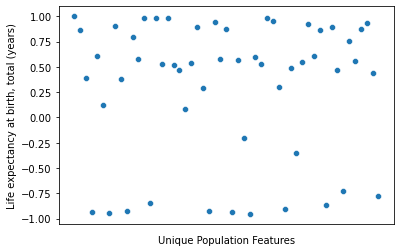

In [ ]:
# Displaying correlation of features aggainst life expectancy
scatterplot1 = sns.scatterplot(data = datasetcorr1['Life expectancy at birth, total (years)'])
scatterplot1.set(xticklabels = [],xlabel = 'Unique Population Features')
scatterplot1.tick_params(bottom=False)
#https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot

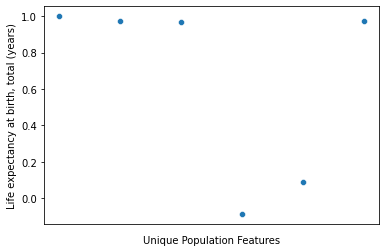

In [ ]:
# Displaying correlation of features aggainst life expectancy
scatterplot2 = sns.scatterplot(data = datasetcorr2['Life expectancy at birth, total (years)'])
scatterplot2.set(xticklabels = [],xlabel = 'Unique Population Features')
scatterplot2.tick_params(bottom=False)

Observe heatmap of the total population statistics against life expectancy

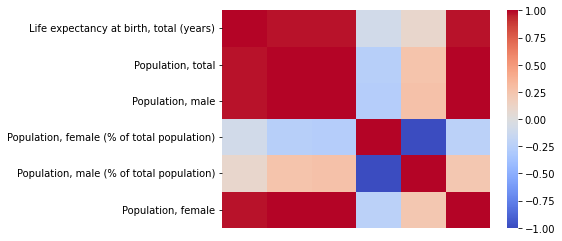

In [ ]:
# total population correlations
sns.heatmap(datasetcorr2,cmap='coolwarm',xticklabels = False)
plt.show()

Displays all the positive strong correlated features

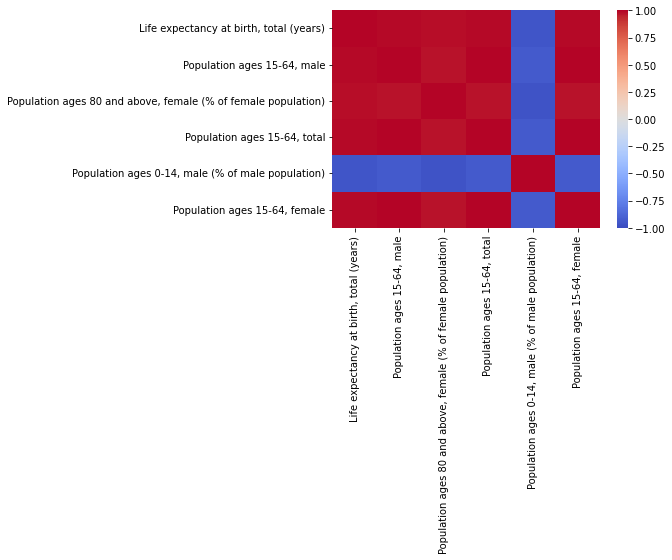

In [ ]:
datasetcorr1_copy = datasetcorr1.copy() 
for i in range(len(datasetcorr1['Life expectancy at birth, total (years)'])):
    if abs(datasetcorr1['Life expectancy at birth, total (years)'][i]) <0.95 :
        datasetcorr1_copy.drop(labels = datasetcorr1.index[i], axis = 0,inplace = True)
        datasetcorr1_copy.drop(labels = datasetcorr1.index[i], axis = 1,inplace = True)
sns.heatmap(datasetcorr1_copy,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

Displays all the strong negative correlated features

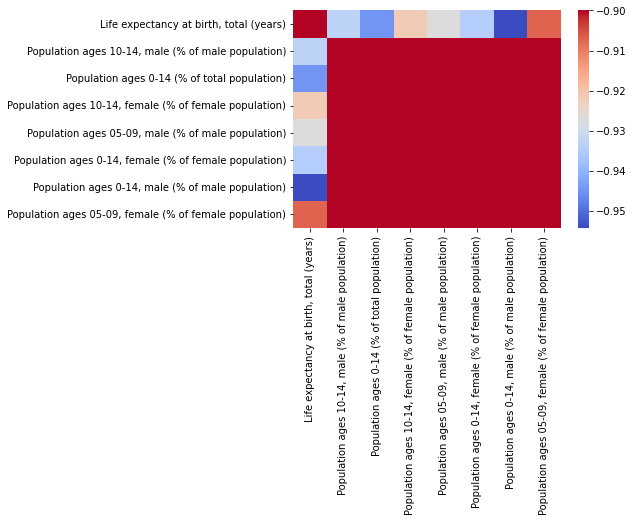

In [ ]:
datasetcorr1_copy2 = datasetcorr1.copy() 
for i in range(len(datasetcorr1['Life expectancy at birth, total (years)'])):
    if -0.9<datasetcorr1['Life expectancy at birth, total (years)'][i]<1:
        datasetcorr1_copy2.drop(labels = datasetcorr1.index[i], axis = 0,inplace = True)
        datasetcorr1_copy2.drop(labels = datasetcorr1.index[i], axis = 1,inplace = True)
sns.heatmap(datasetcorr1_copy2,cmap='coolwarm',vmax=-0.9)
plt.show()

## 2.3 Data Imputation
- There are 2 types of data imputation: univariate and multivariate. While the strategy of univariate imputation is easier and less computational to apply, the results of multivariate imputation are often better, especially in the presence of high-dimensional data.
- A popular multivariate imputation technique is iterative imputation. This refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features. This process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.
- Different regression algorithms can be used to estimate the missing values for each feature, although linear methods (e.g. Bayesian Ridge regression) are often used for simplicity.<br><br>

In [ ]:
# for the best performance of IterativeImputer, we divide the dataset into batches having 10 features each
batches = np.arange(0, df_cleaned.shape[1],10)

# applying IterativeImputer to batches of data
dummy_array = np.zeros((df_cleaned.shape[0],1)) # create a dummy array to store the result of each batch

for i in batches:
    imp = IterativeImputer(random_state=42, max_iter=150)
    data = df_cleaned.iloc[:,i:i+10]
    imputed_data = imp.fit_transform(data)
    dummy_array = np.hstack((dummy_array,imputed_data))

dummy_array = dummy_array[:,1:] # get rid of the first dummy column

#Store results into new dataframe
df_imputed = pd.DataFrame(columns=df_cleaned.columns, data=dummy_array, index=df_cleaned.index)

#checking for Nan values in the imputed Dataframe
print("Number of missing values in dataset after imputation (should be 0):" ,df_imputed.isna().sum().sum())

Number of missing values in dataset after imputation (should be 0): 0


In [ ]:
df_imputed_2020 = df_imputed.copy()
df_imputed.drop(60, axis=0, inplace=True)
#output scaled imputed data as csv
df_imputed.to_csv('./misc/df_imputed.csv',index=False)

In [ ]:
df_imputed

,Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Net barter terms of trade index (2000 = 100),Merchandise imports from high-income economies (% of total merchandise imports),Urban population (% of total population),"Population, total","Population ages 65 and above, male (% of male population)","Population ages 35-39, male (% of male population)","Population ages 10-14, male (% of male population)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Labor force participation rate for ages 15-24, total (%) (national estimate)",...,GNI (current LCU),Natural gas rents (% of GDP),Discrepancy in expenditure estimate of GDP (current LCU),Adjusted net national income (current US$),Adjusted savings: carbon dioxide damage (current US$),Imports of goods and services (current US$),"Gross fixed capital formation, private sector (% of GDP)",Final consumption expenditure (annual % growth),General government final consumption expenditure (constant LCU),"Life expectancy at birth, total (years)"
0,0.866813,78.913107,60.784629,69.996,180671000.0,8.199856,6.921554,9.549929,81.7410,56.40,...,5.464000e+11,-1.139284,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,15.313823,2.591160,2.091050e+12,69.770732
1,0.968558,79.500442,61.907031,70.377,183691000.0,8.225849,6.819212,9.703123,79.1850,56.30,...,5.668000e+11,-0.946802,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,14.841115,2.591158,2.091050e+12,70.270732
2,1.272206,80.161652,63.857581,70.757,186538000.0,8.233387,6.693171,9.813903,76.6290,55.80,...,6.092000e+11,-0.791341,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,15.022310,2.591159,2.091050e+12,70.119512
3,1.306122,80.520056,64.824298,71.134,189242000.0,8.232538,6.549346,9.894824,74.6802,55.20,...,6.431000e+11,-0.783912,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,15.299092,2.591160,2.091050e+12,69.917073
4,1.061018,81.166989,65.680703,71.508,191889000.0,8.231044,6.399562,9.970752,72.7314,55.30,...,6.907000e+11,-0.549336,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,15.645961,2.591164,2.091050e+12,70.165854
5,0.763476,82.760189,68.552213,71.879,194303000.0,8.230498,6.254859,10.060468,70.7826,55.80,...,7.490000e+11,-0.346273,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,16.189324,2.591168,2.091050e+12,70.214634
6,0.884740,84.362213,70.827218,72.247,196560000.0,8.300635,6.125155,10.166323,68.8338,57.10,...,8.201000e+11,-0.181266,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,16.024540,2.591166,2.091050e+12,70.212195
7,0.811117,85.523866,72.738562,72.612,198712000.0,8.366037,5.991005,10.276699,66.8850,57.70,...,8.671000e+11,-0.037438,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,15.411396,2.591163,2.091050e+12,70.560976
8,0.784039,86.781310,75.172303,72.974,200706000.0,8.427060,5.854647,10.365175,65.7818,57.70,...,9.486000e+11,-0.136521,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,15.692308,2.591163,2.091050e+12,69.951220
9,0.800801,88.326015,77.095328,73.333,202677000.0,8.478983,5.728504,10.413333,64.6786,58.90,...,1.026000e+12,0.042363,-1.325170e+09,7.625218e+12,9.010749e+10,1.258673e+12,17.021277,2.591174,2.091050e+12,70.507317


## 2.4 Feature Scaling for Principal Component Analysis 
Feature Scaling is an important step in our pipeline because it speeds the rate of convergence to the solution when applying machine learning models, making the process more efficient and allows us to perform Principal Component Analysis (PCA). The form of feature scaling that we use is standardization. This is because the features relating to our problem could either be negatively or positively correlated with life expectancy. 

We have used “ Standard Scaler ” from Scikit Learn which is known as the “Z-Score” method as it removes the mean and scales each datapoint to unit variance.
 


In [ ]:
# isolating target and features for pca 
target_pca=df_imputed['Life expectancy at birth, total (years)']
data_pca = df_imputed.iloc[:,:-1]

# scaling features for PCA
scaler_pca = StandardScaler()
scaler_pca.fit(data_pca)

dataSC = scaler_pca.transform(data_pca)
dataSC = pd.DataFrame(dataSC, columns = data_pca.columns)

dataSC_1 = dataSC

## 2.5 Principal Component Analysis
For our project, the method chosen for dimensionality reduction is Principal Component Analysis (PCA). This decision was based on the fact that PCA is useful in observing the inherent structure of the data such as, the variability between the features/components. As our cleaned dataset contains 441 features, it is likely that the data variability can be explained through several prominent features. 

In [ ]:
# performing pca
pca = PCA()
featuresPCA = pca.fit_transform(dataSC)

### 2.5.1 Finding Optimal Number of Principal Components in Regarding to Varaibility Preservation

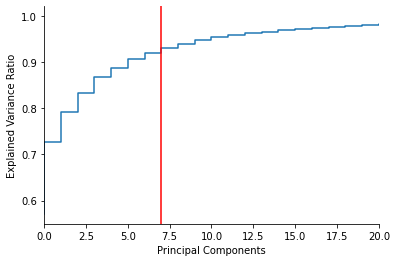

In [ ]:
# determining explained variance using the explained_variance_ratio_ attribute
explained_variance_pca = pca.explained_variance_ratio_

# cumulative sum of eigenvalues
cumulative_sum_eigenval = np.cumsum(explained_variance_pca)

plt.step(range(0,len(cumulative_sum_eigenval)), cumulative_sum_eigenval)
plt.axvline(x=7,color='red')
plt.xlim(0,20)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
sns.despine()

plt.show()

In [ ]:
print("Variance explained by the First 7 Principal Components is:", str(np.cumsum(explained_variance_pca * 100)[6])+"%")

Variance explained by the First 7 Principal Components is: 90.62174895213819%


**PCA Results and Decision Making Explanation**  

As can be seen from the graph, after 11 number of features we retain 95% of the data variability.  
 If another feature is added, it would add 0.35% data variability which will reduce even further when more features are added.  
 To reach 98% datavariablity, 25 number of features are required which is almost a 100% in the number of features. So, the decision to utilize 95% of the data variability was to maintain a balance between the number of features and the data variability gained.

These 13 principal components will be the main focus of our predictive model modeling.

### 2.5.2 Data Dimension Reduction to 7 Implementation

In [ ]:
# number of component found most suitable is 7 hence dimension reduction target = 7
pca= PCA(n_components=7) # reduce dimension to 7

df_pca = pd.DataFrame(pca.fit_transform(dataSC)) #dimensional reduced data as a dataframe 

df_pca

,0,1,2,3,4,5,6
0,-17.272931,18.228982,-5.203017,1.353027,-3.514612,-2.526766,-0.018100
1,-17.731357,18.051917,-4.369055,2.517101,-4.267617,-2.361611,-0.132429
2,-17.757191,18.275420,-4.215115,1.293789,-3.031935,-2.537289,-0.416823
3,-17.331640,17.759194,-3.498864,1.415377,-2.749247,-2.059373,-0.310318
4,-17.022305,17.071124,-2.978735,0.909786,-1.789341,-1.927687,-0.251579
5,-16.432704,16.048413,-2.924317,-0.016665,-0.703953,-1.483221,0.140650
6,-15.922284,15.164778,-2.932937,-0.508609,0.432376,-0.682241,0.847077
7,-15.284411,14.008838,-2.366058,-0.176721,0.989488,0.120663,1.625721
8,-14.959745,12.825404,-2.196117,-0.916874,1.455402,0.306144,1.335581
9,-15.118829,11.930879,-1.167427,-1.981405,1.868158,0.233396,2.337916


In [ ]:
# getting list of feature names having the biggest contribution in each PCA'd feature
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
features = list(dataSC.columns)
PCAFeatures = [features[most_important[i]] for i in range(n_pcs)]
PCAFeatures

['Final consumption expenditure (constant 2015 US$)',
 'Labor force participation rate for ages 15-24, female (%) (national estimate)',
 'Population ages 40-44, female (% of female population)',
 'Gross fixed capital formation, private sector (% of GDP)',
 'Expense (% of GDP)',
 'Adjusted savings: energy depletion (current US$)',
 'Gross capital formation (annual % growth)']

# 3 Model
In this section, we will first test 3 models: Linear Regression, Stochastic Gradient Descent Regressor (SGD), and Random Forest.
The steps are as follows:
1. Split data into training and testing sets
2. Apply 3 models to the training set to compare performance using the cross-validation technique
3. Retrain data on the better model and apply to the testing set to get preliminary prediction
4. Visualise the results

## 3.1 Test Train Split

In [ ]:
X = df_pca

y = df_cleaned['Life expectancy at birth, total (years)'].drop(60,axis=0)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Number of observations in train data:', X_train.shape[0])
print('Number of observations in test data:', X_test.shape[0])

Number of observations in train data: 48
Number of observations in test data: 12


## 3.2 Training and Fitting Potential Models with Cross-Validation

In [ ]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(random_state=0))
rf_reg = make_pipeline(RandomForestRegressor(random_state=1))

cv_no = X_train.shape[0]

# using Leave-One-Out cross validation to compare models performance
scoring = 'neg_mean_squared_error'
lin_score = cross_validate(lin_reg, X_train, y_train, scoring=scoring, return_estimator=True, cv=KFold(cv_no, shuffle=True, random_state=1))
sgd_score = cross_validate(sgd_reg, X_train, y_train, scoring=scoring, return_estimator=True, cv=KFold(cv_no, shuffle=True, random_state=2))
rf_score = cross_validate(rf_reg, X_train, y_train, scoring=scoring, return_estimator=True, cv=KFold(cv_no, shuffle=True, random_state=3))

## 3.3 Model Normality Test for Statistical Significance Test Methods

In [ ]:
print("Testing the null hypothesis that the Linear Regression's MSE scores comes from a normally distributed population")

stat, p = lilliefors(lin_score['test_score'], dist='norm')

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('95% probably normal distribution')
else:
	print('95% probably NOT normal distribution')

Testing the null hypothesis that the Linear Regression's MSE scores comes from a normally distributed population
stat=0.313, p=0.001
95% probably NOT normal distribution


In [ ]:
print("Testing the null hypothesis that the SGD's MSE scores comes from a normally distributed population")

stat, p = lilliefors(sgd_score['test_score'], dist='norm')

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('95% probably normal distribution')
else:
	print('95% probably NOT normal distribution')

Testing the null hypothesis that the SGD's MSE scores comes from a normally distributed population
stat=0.309, p=0.001
95% probably NOT normal distribution


In [ ]:
print("Testing the null hypothesis that the Random Forest's MSE scores comes from a normally distributed population")

stat, p = lilliefors(rf_score['test_score'], dist='norm')

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('95% probably normal distribution')
else:
	print('95% probably NOT normal distribution')

Testing the null hypothesis that the Random Forest's MSE scores comes from a normally distributed population
stat=0.346, p=0.001
95% probably NOT normal distribution


## 3.4 Models Comparisons via Mann-Whitney U Test
To compare the models, the Mann-Whitney U test is used because of the following reasons:
* The results after training 2 models are collected by cross validation method with the parameter <b><i>shuffle</b></i> set to <b>True</b> and with different seeds for <b><i>random_state</b></i>. Therefore an <b><i>unpaired test</b></i> should be used.
* The MSE scores do not follow normal distributions, therefore a **non-parametric** test should be used. 

### 3.4.1 Compare Linear Regression & SGD

In [ ]:
print('Testing for Linear Regression and SGD')

stat, p = mannwhitneyu(lin_score['test_score'], sgd_score['test_score'])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print("95% probably same distributions")
else:
	print("95% probably different distributions")

Testing for Linear Regression and SGD
stat=1154.000, p=0.991
95% probably same distributions


### 3.4.2 Compare Linear Regression & Random Forest

In [ ]:
print('Testing for Linear Regression and Random Forest')

stat, p = mannwhitneyu(lin_score['test_score'], rf_score['test_score'])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print("95% probably same distributions")
else:
	print("95% probably different distributions")

Testing for Linear Regression and Random Forest
stat=1113.000, p=0.778
95% probably same distributions


### 3.4.3 Compare SGD & Random Forest

In [ ]:
print('Testing for SGD and Random Forest')

stat, p = mannwhitneyu(sgd_score['test_score'], rf_score['test_score'])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print("95% probably same distributions")
else:
	print("95% probably different distributions")

Testing for SGD and Random Forest
stat=1144.000, p=0.956
95% probably same distributions


## 3.5 Model MSE Score Comparison

In [ ]:
print("The average MSE scores of the 3 models:")
print(' - Linear Regression:', -np.mean(lin_score['test_score']))
print(' - SGD:', -np.mean(sgd_score['test_score']))
print(' - Random Forest:', -np.mean(rf_score['test_score']))

The average MSE scores of the 3 models:
 - Linear Regression: 0.05478225877880876
 - SGD: 0.06356420716708536
 - Random Forest: 0.08401906874628802


## 3.6 Linear Regression as the Chosen Model Implementation
It seems that there is no difference in using Linear Regression, SGD, or Random Forest. Therefore, based on the lower MSE score and the simplicity of the model, we chose Linear Regression to proceed with training and predicting.

In [ ]:
# normalising data since Linear Regresison is sensitive to data range
scaler = StandardScaler()

#fit the scaler to train data
scaler.fit(X_train, y_train)

#get scaled data for train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

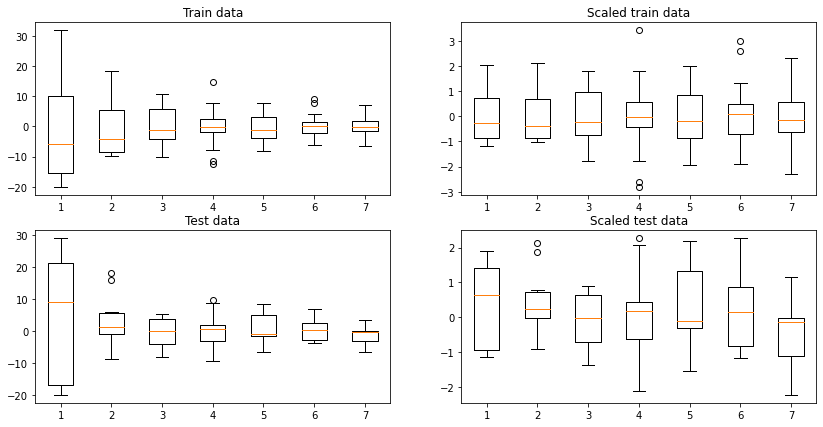

In [ ]:
#Create subplot placeholders
fig, axes = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(14)

#Train data
axes[0,0].boxplot(X_train)
axes[0,0].set_title('Train data')

#Scaled train data
axes[0,1].boxplot(X_train_scaled)
axes[0,1].set_title('Scaled train data')

#Test data
axes[1,0].boxplot(X_test)
axes[1,0].set_title('Test data')

#Scaled test data
axes[1,1].boxplot(X_test_scaled)
axes[1,1].set_title('Scaled test data')

plt.show()

Applying Standard Scaler reduced the gap among the range of features. This step is important for the Linear Regression model, which is sensitive to the range of independent variables.

In [ ]:
# fit OLS model
reg = LinearRegression().fit(X_train_scaled, y_train)

# save model to files
import pickle
filename = './misc/linear_reg_model.sav'
pickle.dump(reg, open(filename, 'wb'))

In [ ]:
# load the saved model from files
loaded_model = pickle.load(open(filename, 'rb'))

# predict with the saved model
y_pred = loaded_model.predict(X_test_scaled)

# get model coefficients and intercept
coefs = loaded_model.coef_
intercept = loaded_model.intercept_
print('Model coefficients:', coefs)
print('Model intercept:', intercept)

# get MSE and coefficient of determination
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Model coefficients: [ 2.64822727 -1.05817047  0.13764429  0.15082059  0.02330824 -0.12573083
 -0.1307922 ]
Model intercept: 74.69400406504066
Mean squared error: 0.04085838937996172
R2 score: 0.9965278813188855


In [ ]:
PCAFeatures

['Final consumption expenditure (constant 2015 US$)',
 'Labor force participation rate for ages 15-24, female (%) (national estimate)',
 'Population ages 40-44, female (% of female population)',
 'Gross fixed capital formation, private sector (% of GDP)',
 'Expense (% of GDP)',
 'Adjusted savings: energy depletion (current US$)',
 'Gross capital formation (annual % growth)']

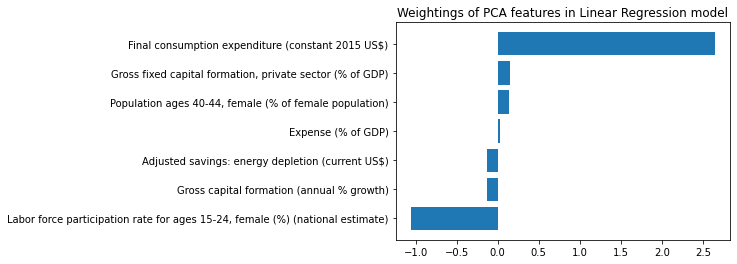

In [ ]:
#plotting feature names and their weights
feature_names = PCAFeatures
temp_df = pd.DataFrame(coefs, index=feature_names)
temp_df.sort_values(by=0, inplace=True)

plt.barh(y=temp_df.index, width=temp_df.iloc[:,0])
# plt.xticks(rotation=90)
plt.title('Weightings of PCA features in Linear Regression model')
plt.savefig('./misc/chosen-model-features-weighting.png', bbox_inches='tight')
plt.show()

## 3.7 Residual Analysis for Further Model Validation

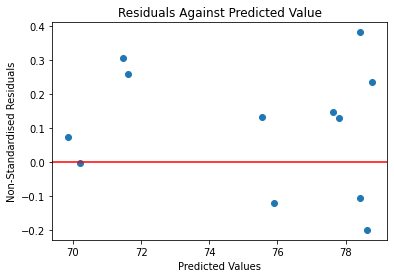

In [ ]:
#residuals (non standardised)
residuals = y_pred - y_test 

#plotting residual plot
fig, ax = plt.subplots()
ax.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel('Non-Standardised Residuals')
plt.xlabel('Predicted Values')
plt.title('Residuals Against Predicted Value')
plt.show()

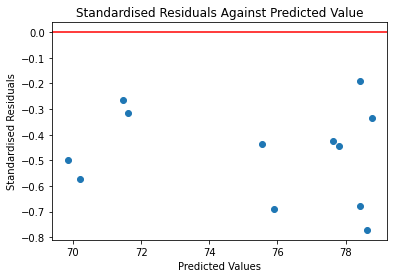

In [ ]:
#standardising residuals

std_residuals = residuals - residuals.mean() / residuals.std()

#plotting residual plot
fig, ax = plt.subplots()
ax.scatter(y_pred,std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel('Standardised Residuals')
plt.xlabel('Predicted Values')
plt.title('Standardised Residuals Against Predicted Value')
plt.show()

## 3.8 Variance Inflation Factors (VIF) Test for Multicollinearity for Ridge Linear Regression 

Found out that:
* No PCA all features exhibited infinite VIF and thefore high multicollinearity, therefore high redundnacy of features.
* Linear Regression must assume that features are independent.
* After PCA all features exhibited 1-2 VIF and therefore very low multicollinearity, hence PCA was very effective at reducing noise.
* Due to low VIF after PCA, Ridge Linear Regression is not needed,OLS is sufficient and effective enough.

In [ ]:
# Data underwent imputation and scaling

# Adding constant to allow VIF
vif_df = add_constant(dataSC)

# Perform VIF
vif_nopca_results =pd.Series([variance_inflation_factor(vif_df.values, i)
               for i in range(vif_df.shape[1])], 
              index=vif_df.columns)

vif_nopca_results

/root/venv/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                                                                                                                6247.222458
Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)            inf
Net barter terms of trade index (2000 = 100)                                                                                 inf
Merchandise imports from high-income economies (% of total merchandise imports)                                              inf
Urban population (% of total population)                                                                                     inf
                                                                                                                        ...     
Adjusted savings: carbon dioxide damage (current US$)                                                                        inf
Imports of goods and services (current US$)                                                      

In [ ]:
#perform VIF on PCAS
#adding constant to allow VIF
vif_df = add_constant(X)

#perform VIF
vif_pca_results =pd.Series([variance_inflation_factor(vif_df.values, i) 
               for i in range(vif_df.shape[1])], 
              index=vif_df.columns)

vif_pca_results

const    1.0
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
dtype: float64

## 3.9 Test for Heteroscedasticity in Regression Model (Via White's Test)

In [ ]:
#perform white's test
white_test = het_white(residuals, X_test_scaled)

In [ ]:
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

print('\nNull Hypothesis H0:\n1.Homoscedasity is present.\n2.Residuals are equally scattered.\n3.Variance for errors are equal.\n')

print('Alternative Hypothesis H1:\n1.Heteroscedasicity is present.\n2.Residuals are not equally scattered.\n3.Variance for errors are not equal.')

print('\nResults and Interpretation:\n1.P-value < 0.05 for significance level of 0.05:\n2.Failed to reject null hypothesis.\n3.No heteroscedasity present.\n4.Therefore fits with the Linear Regression model assumption. ')

{'Test Statistic': 12.0, 'Test Statistic p-value': 0.36364322051682674, 'F-Statistic': nan, 'F-Test p-value': nan}

Null Hypothesis H0:
1.Homoscedasity is present.
2.Residuals are equally scattered.
3.Variance for errors are equal.

Alternative Hypothesis H1:
1.Heteroscedasicity is present.
2.Residuals are not equally scattered.
3.Variance for errors are not equal.

Results and Interpretation:
1.P-value < 0.05 for significance level of 0.05:
2.Failed to reject null hypothesis.
3.No heteroscedasity present.
4.Therefore fits with the Linear Regression model assumption. 


# 4 Project Improvements

## 4.1 Data imputation ver 2.0

References: https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

In [ ]:
# drop the last row with the missing value for independent variable
df_cleaned.drop(60, axis=0, inplace=True)

In [ ]:
X_missing = df_cleaned.iloc[:,:-1]
y_missing = df_cleaned.iloc[:,-1]

print('Shape of independent variables:', X_missing.shape)
print('Shape of dependent variable:', y_missing.shape)

Shape of independent variables: (60, 497)
Shape of dependent variable: (60,)


In [ ]:
N_SPLITS = 5

def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, LinearRegression())
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS, error_score='raise'
    )
    return impute_scores

x_labels = []

mses = np.zeros(2)
stds = np.zeros(2)

### 4.1 kNN Imputer

In [ ]:
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()


mses[0], stds[0] = get_impute_knn_score(
    X_missing, y_missing
)

x_labels.append("KNN Imputation")

### 4.2 Iterative Imputer

In [ ]:
def get_impute_iterative(X_missing, y_missing):
    imputer = IterativeImputer(
        estimator=KNeighborsRegressor(),
        missing_values=np.nan,
        random_state=0,
        n_nearest_features=5,
    )
    iterative_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()


mses[1], stds[1] = get_impute_iterative(
    X_missing, y_missing
)

x_labels.append("Iterative Imputation")

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### 4.3 Comparing kNN and Iterative Imputers

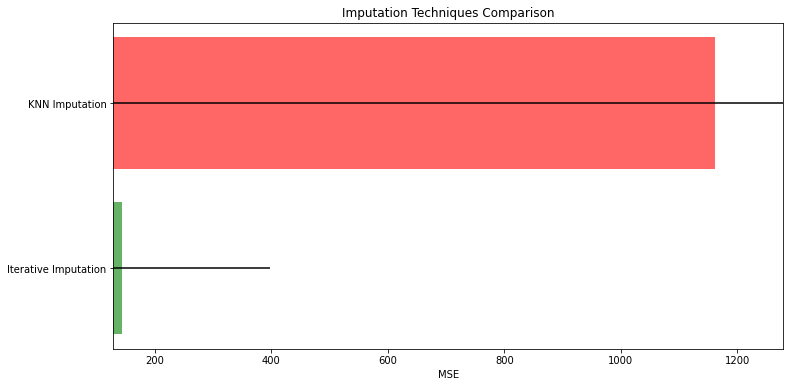

In [ ]:
# convert to positive values for MSE
mses = mses * -1

# plot the results
n_bars = len(mses)
xval = np.arange(n_bars)

colors = ["r", "g"]

# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
for j in xval:
    ax1.barh(
        j,
        mses[j],
        xerr=stds[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Imputation Techniques Comparison")
ax1.set_xlim(left=np.min(mses) * 0.9, right=np.max(mses) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)

plt.show()

### 4.4 Concluding on chosen method of data imputation

Iterative Imputer has better performance and therefore is chosen to be the method of data imputation.

## 4.2 Additional Features engineering

### 4.2.1 Averaging Male and Female Features Together
* Since life expectancy is an average of both sexes, then it is intuitive to combine all sex related features into one.
* new **fe1_data** contains sex averaged features.

In [ ]:
"""Finding all sex related features from imputed data"""

dfcolumns = list(df_imputed.columns)

def global_sort(word,list):
    """loops through a list, checks exact match if so adds to new list, returns list"""
    outputlist=[]
    for i in list:
        if str(word.lower()) in i.lower():
            outputlist.append(i)
        else:
             None   
    return outputlist

"""Grouping features by sex"""
#finding all feature names to do with sex
by_gender_features = global_sort('male',dfcolumns)

#grouping all female feature names
female_features = sorted(global_sort('Fem',by_gender_features))

def cross_elim(condition_list,list):
    """Compares 2 lists, eliminates matched list """
    list=list
    for i in condition_list:
        if i in list:
            list.remove(i)
        else:
            None
    return list

#grouping all male feature names
male_features=sorted(cross_elim(female_features,by_gender_features))


In [ ]:
print('Number of male features',len(male_features))
print('Number of female features',len(female_features),'\n')
print('Do to features being droped because of null threshold value, number of male and female feature are not equal.\nHence, further columns must be dropped so that the same features are present for both female and male to be able to take average.')

print('\nMale features:')
for i in male_features:
    print(i)

print('\nFemales Features:')
for i in female_features:
    print(i)

del female_features[7]

Number of male features 35
Number of female features 36 

Do to features being droped because of null threshold value, number of male and female feature are not equal.
Hence, further columns must be dropped so that the same features are present for both female and male to be able to take average.

Male features:
Employment to population ratio, 15+, male (%) (national estimate)
Employment to population ratio, ages 15-24, male (%) (national estimate)
Labor force participation rate for ages 15-24, male (%) (national estimate)
Labor force participation rate, male (% of male population ages 15+) (national estimate)
Mortality rate, adult, male (per 1,000 male adults)
Mortality rate, infant, male (per 1,000 live births)
Mortality rate, under-5, male (per 1,000 live births)
Population ages 0-14, male
Population ages 0-14, male (% of male population)
Population ages 00-04, male (% of male population)
Population ages 05-09, male (% of male population)
Population ages 10-14, male (% of male popul

In [ ]:
print('Only one feature difference, ratio was dropped in the female features collection.\n')

print('Male features')
for i in male_features:
    print(i)

print('\nFemales Features')
for i in female_features:
    print(i)

print('\nNumber of male features',len(male_features))
print('Number of female features',len(female_features),'\n')


Only one feature difference, ratio was dropped in the female features collection.

Male features
Employment to population ratio, 15+, male (%) (national estimate)
Employment to population ratio, ages 15-24, male (%) (national estimate)
Labor force participation rate for ages 15-24, male (%) (national estimate)
Labor force participation rate, male (% of male population ages 15+) (national estimate)
Mortality rate, adult, male (per 1,000 male adults)
Mortality rate, infant, male (per 1,000 live births)
Mortality rate, under-5, male (per 1,000 live births)
Population ages 0-14, male
Population ages 0-14, male (% of male population)
Population ages 00-04, male (% of male population)
Population ages 05-09, male (% of male population)
Population ages 10-14, male (% of male population)
Population ages 15-19, male (% of male population)
Population ages 15-64, male
Population ages 15-64, male (% of male population)
Population ages 20-24, male (% of male population)
Population ages 25-29, male (

In [ ]:
"""Create column names for the averages"""
#making a list of features names that replaces 'male' with 'all sexes'
names = male_features.copy()
j=0
for i in names:
    names[j]=i.replace('male','all sexes')
    j+=1

print(len(names)) #checking if all 10 feature titles have been converted

def column_average(list1,list2,df,names):
    """Calculates average of features, from two lists, result appended as new column in dataframe, return df"""
    count=0
    for i in range(len(list1)):
        df[names[count]]=df[[list1[i],list2[i]]].mean(axis=1)
        count+=1
    return df

#new df contains columns of average of sex related features and appropriately named the resulting columns
fe1_data = column_average(female_features,male_features,df_imputed,names)


#dropping all female and male features 
fe1_data.drop(male_features,axis=1,inplace=True)
fe1_data.drop(female_features,axis=1,inplace=True)

35


In [ ]:
print(fe1_data.columns)
print(fe1_data.shape)

Index(['Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
       'Net barter terms of trade index (2000 = 100)',
       'Merchandise imports from high-income economies (% of total merchandise imports)',
       'Urban population (% of total population)', 'Population, total',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Labor force participation rate for ages 15-24, total (%) (national estimate)',
       'Gross savings (current LCU)', 'GNI (current US$)',
       'Adjusted savings: net national savings (% of GNI)',
       ...
       'Population ages 65 and above, all sexes (% of all sexes population)',
       'Population ages 65-69, all sexes (% of all sexes population)',
       'Population ages 70-74, all sexes (% of all sexes population)',
       'Population ages 75-79, all sexes (% of all sexes population)',
       'Population ages 80 and above, all sexes (% of all sexes population)',
 

### 4.2.2 PCA using the New Engineered Features

In [ ]:
sc = StandardScaler()
sc.fit(fe1_data)

dataSC = sc.transform(fe1_data)

#Isolating target and features for pca
target_pca = df_imputed['Life expectancy at birth, total (years)']

dataSC = pd.DataFrame(dataSC, columns = fe1_data.columns)

dataSC.shape

(60, 463)

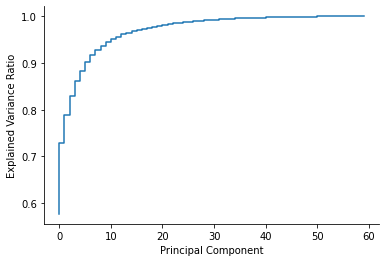

Variance explained by the First 7 Principal Components is:  90.12724393242738 %


In [ ]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA()
featuresPCA = pca.fit_transform(dataSC)

#Determine explained variance using the explained_variance_ratio_ attribute
explained_variance_pca = pca.explained_variance_ratio_

#Cumulative sum of eigenvalues
cumulative_sum_eigenval = np.cumsum(explained_variance_pca)

plt.step(range(0,len(cumulative_sum_eigenval)), cumulative_sum_eigenval,)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
sns.despine()
plt.show()

print("Variance explained by the First 7 Principal Components is: ", np.cumsum(explained_variance_pca * 100)[6], "%")

In [ ]:
# Number of component found most suitable is 7 hence dimension reduction target = 7
pca= PCA(n_components=7) # reduce dimension to 7
df_pca_new = pd.DataFrame(pca.fit_transform(dataSC)) #dimensional reduced data as a dataframe 

df_pca_new

,0,1,2,3,4,5,6
0,-16.043944,17.388192,-4.754435,1.944899,-2.398283,-2.416565,-0.076672
1,-16.530122,17.342338,-4.007993,3.019262,-3.008620,-2.337276,-0.068692
2,-16.565670,17.576503,-3.917061,1.792283,-2.030441,-2.464179,0.368669
3,-16.153072,17.101324,-3.306445,1.821857,-1.846442,-2.024760,0.226401
4,-15.848907,16.416785,-2.864430,1.259789,-1.084363,-1.886532,0.231084
5,-15.262983,15.364111,-2.899957,0.364773,-0.299368,-1.434689,-0.070619
6,-14.779500,14.494656,-2.980730,-0.055875,0.608061,-0.613157,-0.690761
7,-14.143263,13.376166,-2.492525,0.231429,1.087901,0.176236,-1.511583
8,-13.873531,12.284969,-2.481363,-0.517125,1.351073,0.358825,-1.214769
9,-14.086763,11.540194,-1.609323,-1.587015,1.550309,0.239332,-2.133568


### 4.2.3 Fitting a Linear Regression Model

In [ ]:
X_new = df_pca_new
y_new = target_pca

#split data in train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
#normalise data
scaler_new = StandardScaler()

#fit the scaler to train data
scaler_new.fit(X_train_new)

#get scaled data for train and test set
X_train_scaled_new = scaler_new.transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

In [ ]:
#fit OLS model
reg_new = LinearRegression().fit(X_train_scaled_new, y_train_new)

#predict with the model
y_pred_new = reg_new.predict(X_test_scaled_new)

#get model coefficients and intercept
coefs_new = reg_new.coef_
intercept_new = reg_new.intercept_
print('Model coefficients:', coefs_new)
print('Model intercept:', intercept_new)

#get MSE and coefficient of determination
mse_new = mean_squared_error(y_test_new, y_pred_new)
print('Mean squared error:', mse_new)
r2_new = r2_score(y_test_new, y_pred_new)
print('R2 score:', r2_new)

Model coefficients: [ 2.62440393 -1.11360264  0.17247872  0.12012873  0.01287436 -0.13609106
  0.14631631]
Model intercept: 74.69400406504066
Mean squared error: 0.04998408418145364
R2 score: 0.9957523858605659


### 4.2.4 Model performance

In [ ]:
new_lin_score = cross_validate(reg, X_train_new, y_train_new, scoring=scoring, return_estimator=True, cv=KFold(X_train_new.shape[0], shuffle=True))

print('Linear Regression score:', abs(new_lin_score['test_score'].mean()))

Linear Regression score: 0.06071387299671218


### 4.2.5 Model Normality Test for Statistical Significance Test Methods

In [ ]:
print("Testing the null hypothesis that the Linear Regression's MSE scores comes from a normally distributed population")

stat, p = lilliefors(new_lin_score['test_score'], dist='norm')

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('95% probably normal distribution')
else:
	print('95% probably NOT normal distribution')

Testing the null hypothesis that the Linear Regression's MSE scores comes from a normally distributed population
stat=0.299, p=0.001
95% probably NOT normal distribution


### 4.2.6 Compare Old Linear Regression & New Linear Regression

In [ ]:
print('Testing for Old Linear Regression and New Linear Regression')

stat, p = mannwhitneyu(lin_score['test_score'], new_lin_score['test_score'])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print("95% probably same distributions")
else:
	print("95% probably different distributions")

Testing for Old Linear Regression and New Linear Regression
stat=1262.000, p=0.422
95% probably same distributions


### 4.2.7 Concluding on the impact of feature engineering

With the above results of Mann-Whitney U test, it can be concluded that feature engineering did not improve the performance of the model.

# 5 Forecasting Life Expectancy for the next decade

<b>Three forecasting models are produced:</b>
- Forecasting applied to Life Expectancy
- Forecasting applied to the dimensionality reduced features after PCA is applied
- Forecasting applied to the non-PCA cleaned dataset with 498 features
<b>DataFrame Formatting applied to input data:</b>
- A time series is required so a dataframe is developed to include Life Expectancy and Years
* A date/time type is required as the index for ARIMA model

## 5.1 Loading Prediction DataFrame For Forecasting
* A CSV called 'predict' is loaded which includes the years that the ARIMA model will forecast (2020-2030)
- The PredictDF DataFrame is then formatted with the requriments listed above

In [ ]:
# Create a DataFrame with a Year column (from 2020 to 2021) and an empty Predict column
d = {
    'Year': [2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030],
    'Predict': [np.NaN]*11
    }
PredictDF = pd.DataFrame(data=d)
PredictDF['Year']=pd.to_datetime(PredictDF['Year'],format ='%Y')
PredictDF.set_index('Year',inplace = True)

## 5.2 Forecasting Life Expectancy as a time series using ARIMA
- As 2020 was an unprecedented year due to COVID-19, causing a reduction in life expectancy, the ARIMA model is first attempted with the 2020 data included.
- Another ARIMA model is generated without the 2020 data to compare.

<b>Forecasting Life Expectancy With 2020</b>

In [ ]:
#DataFrame is developed and formatted so ARIMA can perform
target_pca_2020=df_imputed_2020['Life expectancy at birth, total (years)']
DF_With_Life_2020 = pd.concat([Year_Series_2020,target_pca_2020],axis = 1)
DF_With_Life_2020['Year']=pd.to_datetime(DF_With_Life_2020['Year'],format ='%Y')
DF_With_Life_2020.set_index('Year',inplace = True)

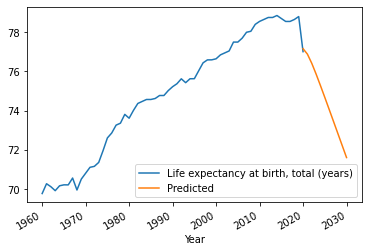

In [ ]:
#ARIMA is applied to the input data
arima_model_Life_2020 = auto_arima(DF_With_Life_2020,
                        trace = False, error_action = 'ignore', information_criterion = 'aic', test = 'adf',
                        supress_warnings = True, stepwise = True)
#Trained ARIMA model is used for forecasting
Life_Prediction_2020 = pd.DataFrame(arima_model_Life_2020.predict(n_periods = 11),index = PredictDF.index)
LifeDF_2020 = pd.concat([DF_With_Life_2020,Life_Prediction_2020],axis = 0)
LifeDF_2020.reset_index(inplace = True)
LifeDF_2020.rename(columns = {0:'Predicted'},inplace=True)
LifeDF_2020.plot(x = 'Year')
plt.show()

<b>Forecasting Life Expectancy Without 2020</b>

In [ ]:
#DataFrame is developed and formatted so ARIMA can perform
DF_With_Life = pd.concat([Year_Series,target_pca],axis = 1)
DF_With_Life['Year']=pd.to_datetime(DF_With_Life ['Year'],format ='%Y')
DF_With_Life.set_index('Year',inplace = True)

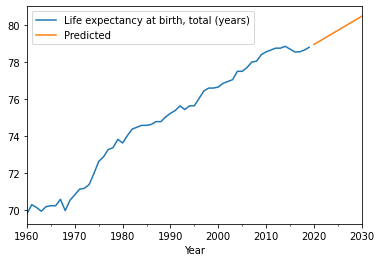

In [ ]:
arima_model_Life = auto_arima(DF_With_Life,
                        trace = False, error_action = 'ignore', information_criterion = 'aic', test = 'adf',
                        supress_warnings = True, stepwise = True)

Life_Prediction = pd.DataFrame(arima_model_Life.predict(n_periods = 11),index = PredictDF.index)
LifeDF = pd.concat([DF_With_Life,Life_Prediction],axis = 0)
LifeDF.reset_index(inplace = True)
LifeDF.rename(columns = {0:'Predicted'},inplace=True)
LifeDF.plot(x = 'Year')
plt.show()

## 5.3 Forecasting Life Expectancy using Linear Regression

- Forecasting future values for independent features using ARIMA to predict life expectancy with a regression model

### 5.3.1 Generating independent features for the next decade from non-PCA data using ARIMA

* Features are forecasted from the Non-PCA DataFrame.

❗❗❗❗❗

✳️For convenience, the following ARIMA code has been commented out as it takes 25 minutes to run on Deepnote. We have run the code and saved the results to a CSV file, which is used later further down.

✳️The results from the ARIMA can be found in the filepath: './misc/projected_indep_features_from_non_PCA.csv'

✳️Please feel free to uncomment the code and run

❗❗❗❗❗



In [ ]:
# #DataFrame Formatting Procedure is applied
# DF_With_Years = pd.concat([Year_Series,dataSC_1],axis = 1)
# #Converting the type into date/time
# DF_With_Years['Year']=pd.to_datetime(DF_With_Years ['Year'],format ='%Y')
# DF_With_Years.set_index('Year',inplace = True)
# features = list(DF_With_Years.columns) #Feature names are extracted

In [ ]:
# #ARIMA model is used on one feature to instantiate the DataFrame. It is then applied to the rest of the
# #input data.
# train_feature = DF_With_Years[features[0]]

# arima_model = auto_arima(train_feature,d= None, trace = False, error_action = 'ignore', test = 'adf',
#                         supress_warnings = True, stepwise = True)

# prediction_overall = pd.DataFrame(arima_model.predict(n_periods = 11),index = PredictDF.index)

# prediction_overall.columns = [features[0]]

# features.remove(features[0])

In [ ]:
# for i in features:
#         train_feature = DF_With_Years[i]

#         arima_model = auto_arima(train_feature,d= None, trace = False, error_action = 'ignore', test = 'adf',
#                          supress_warnings = True, stepwise = True)

#         prediction = pd.Series(arima_model.predict(n_periods = 11),index = PredictDF.index)

#         prediction_overall[i] = prediction

In [ ]:
# data_after_arima = pd.concat([DF_With_Years,prediction_overall],axis = 0)
# data_after_arima.reset_index(inplace = True)
# # data_after_arima.drop('Year',axis = 1,inplace = True)

# # saving projected features from non-PCA data to a CSV file
# data_after_arima.to_csv('./misc/projected_indep_features_from_non_PCA.csv')

### 5.3.2 Generating independent features for the next decade from PCA data using ARIMA
- Dimensionality reduced DataFrame from PCA features are forecasted

❗❗❗❗❗

✳️For convenience, the following ARIMA code has been commented out as it takes 25 minutes to run on deepnote. We have run the code and saved the results to a CSV file, which is used later further down.

✳️The results from the ARIMA can be found in the filepath: './misc/projected_indep_features_from_PCA.csv'

✳️Please feel free to uncomment the code and run

❗❗❗❗❗

In [ ]:
# #DataFrame Formatting Procedure is applied
# DF2_With_Years = pd.concat([Year_Series,df_pca],axis = 1)

# DF2_With_Years['Year']=pd.to_datetime(DF2_With_Years ['Year'],format ='%Y')

# DF2_With_Years.set_index('Year',inplace = True)

# # DF2_With_Years.drop(DF2_With_Years.index[-1], axis=0, inplace=True)

In [ ]:
#PredictDF = pd.read_csv('predict.csv')
#PredictDF['Year']=pd.to_datetime(PredictDF['Year'],format ='%Y')
#PredictDF.set_index('Year',inplace = True)

In [ ]:
# features = list(DF2_With_Years.columns) #Feature names are extracted

In [ ]:
# train_feature = DF2_With_Years[features[0]]

# arima_model = auto_arima(train_feature,d= None, trace = False, error_action = 'ignore', test = 'adf',
#                          supress_warnings = True, stepwise = True)

# prediction_overall = pd.DataFrame(arima_model.predict(n_periods = 11),index = PredictDF.index)

# prediction_overall.columns = [features[0]]
# features.remove(features[0])

In [ ]:
# for i in features:
#     train_feature = DF2_With_Years[i]

#     arima_model = auto_arima(train_feature,d= None, trace = False, error_action = 'ignore', test = 'adf',
#                          supress_warnings = True, stepwise = True)

#     prediction = pd.Series(arima_model.predict(n_periods = 11),index = PredictDF.index)

#     prediction_overall[i] = prediction

In [ ]:
# df_pca_new = pd.concat([DF2_With_Years,prediction_overall],axis = 0)

# df_pca_new.reset_index(inplace = True)

# df_pca_new.drop('Year',axis = 1,inplace = True)

In [ ]:
# df_pca_new.to_csv('./misc/projected_indep_features_from_PCA.csv')

### 5.3.3 Predicting Life Expectancy with projected non-PCA data

In [ ]:
dataSC_2 = pd.read_csv('./misc/projected_indep_features_from_non_PCA.csv')
dataSC_2 = dataSC_2.iloc[: , 1:]
dataSC_2.drop('Year',axis = 1,inplace=True)

In [ ]:
# Scaling the values
sc = StandardScaler()
sc.fit(dataSC_2)

scaled_data = sc.transform(dataSC_2)
scaled_data = pd.DataFrame(scaled_data, columns = dataSC_2.columns)

scaled_data

,Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Net barter terms of trade index (2000 = 100),Merchandise imports from high-income economies (% of total merchandise imports),Urban population (% of total population),"Population, total","Population ages 65 and above, male (% of male population)","Population ages 35-39, male (% of male population)","Population ages 10-14, male (% of male population)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Labor force participation rate for ages 15-24, total (%) (national estimate)",...,Gross savings (% of GNI),GNI (current LCU),Natural gas rents (% of GDP),Discrepancy in expenditure estimate of GDP (current LCU),Adjusted net national income (current US$),Adjusted savings: carbon dioxide damage (current US$),Imports of goods and services (current US$),"Gross fixed capital formation, private sector (% of GDP)",Final consumption expenditure (annual % growth),General government final consumption expenditure (constant LCU)
0,-0.394122,-2.389749,-0.195791,-1.780585,-1.693151,-1.062215,0.000587,1.221322,1.838523,-0.944369,...,-0.343519,-1.116221,-2.784663,0.106151,-0.279180,-0.251122,-0.243168,-0.965993,-0.008118,-0.196478
1,-0.151996,-2.307678,-0.088617,-1.690231,-1.633639,-1.053264,-0.112284,1.338841,1.714001,-0.964387,...,-0.189160,-1.113879,-2.381059,0.106151,-0.279180,-0.251122,-0.243168,-1.076295,-0.008120,-0.196478
2,0.570607,-2.215285,0.097634,-1.600114,-1.577537,-1.050669,-0.251295,1.423824,1.589480,-1.064477,...,0.553231,-1.109011,-2.055082,0.106151,-0.279180,-0.251122,-0.243168,-1.034014,-0.008119,-0.196478
3,0.651320,-2.165203,0.189943,-1.510709,-1.524253,-1.050961,-0.409918,1.485900,1.494539,-1.184584,...,0.436601,-1.105119,-2.039504,0.106151,-0.279180,-0.251122,-0.243168,-0.969430,-0.008118,-0.196478
4,0.068036,-2.074804,0.271718,-1.422016,-1.472092,-1.051476,-0.575114,1.544147,1.399598,-1.164566,...,0.957273,-1.099655,-1.547638,0.106151,-0.279180,-0.251122,-0.243168,-0.888491,-0.008115,-0.196478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.684422,0.601351,-1.226243,1.514760,1.402756,2.130555,0.160010,-1.044375,-1.747820,-0.865831,...,-0.081439,1.789158,-0.347222,-2.060688,1.667410,1.494782,1.452161,1.718692,-0.378084,1.210497
67,0.684422,0.601351,-1.255389,1.563296,1.429042,2.269054,0.223789,-1.006119,-1.811338,-0.848092,...,-0.062904,1.856356,-0.347222,-1.539854,1.696904,1.494782,1.452161,1.718692,-0.378084,1.210497
68,0.684422,0.601351,-1.284610,1.611833,1.455327,2.407553,0.279564,-0.959754,-1.874856,-0.830354,...,-0.047636,1.924421,-0.347222,-0.755000,1.726398,1.494782,1.452161,1.718692,-0.378084,1.210497
69,0.684422,0.601351,-1.313861,1.660370,1.481612,2.546052,0.326563,-0.906183,-1.938374,-0.812616,...,-0.035060,1.991274,-0.347222,0.141710,1.755892,1.494782,1.452161,1.718692,-0.378084,1.210497


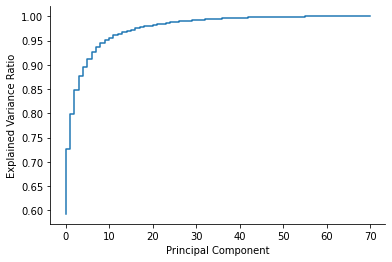

In [ ]:
# Conducting PCA
pca = PCA()
featuresPCA = pca.fit_transform(scaled_data)

#Determine explained variance using the explained_variance_ratio_ attribute
explained_variance_pca = pca.explained_variance_ratio_

#Cumulative sum of eigenvalues
cumulative_sum_eigenval = np.cumsum(explained_variance_pca)

plt.step(range(0,len(cumulative_sum_eigenval)), cumulative_sum_eigenval,)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
sns.despine()
plt.show()

In [ ]:
pca = PCA(n_components=7) # reduce dimension to 7
dd_data_pca = pd.DataFrame(pca.fit_transform(scaled_data)) #dimensional reduced data as a dataframe 
print(dd_data_pca.shape)
print(type(dd_data_pca))
dd_data_pca.head(2)

(71, 7)
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6
0,-19.055031,17.720854,-5.026696,-4.152873,3.623458,1.200130,-2.836774
1,-19.585446,17.446324,-5.255902,-3.096121,4.657389,1.136715,-2.700806


In [ ]:
# Select only the predicted values
dd_data_10 = dd_data_pca[60:]
dd_data_10

,0,1,2,3,4,5,6
60,23.164754,4.210066,3.170287,0.232605,-0.820579,1.113126,0.387756
61,23.629537,4.070677,3.899162,-0.231406,-0.330314,0.859089,-0.130553
62,24.155273,4.203669,4.588437,-0.218603,0.007927,0.493617,-0.262602
63,24.943569,4.935195,6.281799,-0.649260,0.281388,-0.512279,-0.166750
64,25.573651,4.979409,7.103934,-1.027117,0.711532,-0.859857,-0.201376
65,26.105324,5.123833,7.790193,-1.233426,1.027780,-1.122097,-0.337833
66,26.824525,5.605289,9.191611,-1.687618,1.265836,-1.653018,-0.207870
67,27.403772,5.841724,10.223486,-2.055417,1.529257,-2.112321,-0.116997
68,28.011570,6.002986,11.109769,-2.376132,1.756932,-2.512670,-0.288420
69,28.573554,6.326675,12.204293,-2.838612,2.032750,-3.010894,-0.386609


In [ ]:
# Predicting the values
life_exp_predict_pre = reg.predict(scaler.transform(dd_data_10))

# Coefficients and intercept of Linear Model
coefs = reg.coef_
intercept = reg.intercept_
print('Model coefficients:', coefs)
print('Model intercept:', intercept)

Model coefficients: [ 2.64822727 -1.05817047  0.13764429  0.15082059  0.02330824 -0.12573083
 -0.1307922 ]
Model intercept: 74.69400406504066


In [ ]:
life_exp_predict_pre

array([78.14398176, 78.2734761 , 78.38301087, 78.48825432, 78.61049447,
       78.70788122, 78.80292948, 78.89735589, 79.0125178 , 79.10189628,
       79.1939676 ])

### 5.3.4 Predicting Life Expectancy with projected PCA data

In [ ]:
# Read data
dd_data_1 = pd.read_csv('./misc/projected_indep_features_from_PCA.csv')
dd_data_1 = dd_data_1.iloc[: , 1:] # Select everything except the first column

# Select only the predicted values
dd_data_10 = dd_data_1[60:]
dd_data_10

,0,1,2,3,4,5,6
60,33.144463,5.759225,3.418155,-12.408991,-6.047335,-1.393041,1.665299
61,34.283477,5.854371,3.333414,-12.408991,-6.782075,-1.905660,0.000000
62,35.422492,5.949517,3.248672,-12.408991,-7.516814,-2.813449,0.000000
63,36.561507,6.044663,3.163931,-12.408991,-8.251553,-3.858585,0.000000
64,37.700521,6.139809,3.079190,-12.408991,-8.986293,-4.515376,0.000000
65,38.839536,6.234955,2.994448,-12.408991,-9.721032,-5.199603,0.000000
66,39.978551,6.330101,2.909707,-12.408991,-10.455771,-5.943546,0.000000
67,41.117565,6.425247,2.824965,-12.408991,-11.190511,-6.761443,0.000000
68,42.256580,6.520393,2.740224,-12.408991,-11.925250,-7.560146,0.000000
69,43.395594,6.615539,2.655483,-12.408991,-12.659989,-8.297196,0.000000


In [ ]:
# Predicting the values
life_exp_predict = reg.predict(scaler.transform(dd_data_10))

# Coefficients and intercept of Linear Model
coefs = reg.coef_
intercept = reg.intercept_
print('Model coefficients:', coefs)
print('Model intercept:', intercept)

Model coefficients: [ 2.64822727 -1.05817047  0.13764429  0.15082059  0.02330824 -0.12573083
 -0.1307922 ]
Model intercept: 74.69400406504066
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
life_exp_predict

array([79.1784102 , 79.44137545, 79.6471734 , 79.85849632, 80.05419748,
       80.25100228, 80.45020925, 80.65239115, 80.85380094, 81.05273062,
       81.25230276])

## 5.4 Plotting Predictions

In [ ]:
# Years
predict_years = np.arange(1960,2031,1)
predict_years_df = pd.DataFrame(predict_years)

# Life expectancy from original dataset
life_exp_data  = pd.DataFrame(LifeDF['Life expectancy at birth, total (years)'])
life_exp_data.drop(life_exp_data.tail(11).index,axis = 0,inplace = True)

# Prediction using Pre-PCA Data
predict_pre_pca = pd.DataFrame(life_exp_predict_pre)

# Prediction using Post-PCA Data
predict_post_pca = pd.DataFrame(life_exp_predict)

# Prediction using Arima Data
arima_predict = pd.DataFrame(LifeDF['Predicted'])
arima_predict.drop(arima_predict.head(60).index,axis = 0,inplace = True)

### 5.4.1 Predicting Life Expectancy from Linear Regression using projected non-PCA data

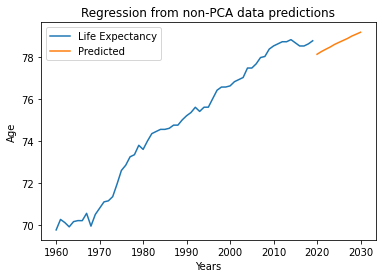

In [ ]:
# Pre-PCA
Pre_PCA_Life = pd.concat([life_exp_data,predict_pre_pca],axis = 0)
Pre_PCA_Life.reset_index(inplace=True)
Pre_PCA_Life['Years'] = predict_years_df
Pre_PCA_Life.drop('index', axis=1, inplace = True)
Pre_PCA_Life.set_index('Years', inplace=True)
Pre_PCA_Life.columns = ['Life Expectancy', 'Predicted']
Pre_PCA_Life.plot(title='Regression from non-PCA data predictions', ylabel='Age')
plt.show()

### 5.4.2 Predicted Life Expectancy from Linear Regression using projected PCA data

<AxesSubplot:title={'center':'Regression from PCA data predictions'}, xlabel='Years', ylabel='Age'>

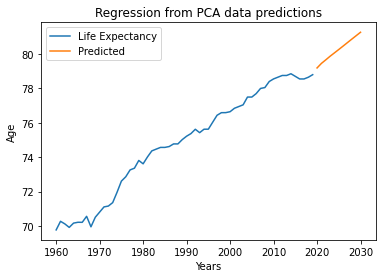

In [ ]:
# Post-PCA
Post_PCA_Life = pd.concat([life_exp_data,predict_post_pca],axis = 0)
Post_PCA_Life.reset_index(inplace=True)
Post_PCA_Life['Years'] = predict_years_df
Post_PCA_Life.drop('index', axis=1, inplace = True)
Post_PCA_Life.set_index('Years', inplace=True)
Post_PCA_Life.columns = ['Life Expectancy', 'Predicted']
Post_PCA_Life.plot(title='Regression from PCA data predictions', ylabel='Age')

### 5.4.3 Predicted Life Expectancy from ARIMA (as a stand-alone time series)

<AxesSubplot:title={'center':'Time Series ARIMA Prediction'}, xlabel='Years', ylabel='Age'>

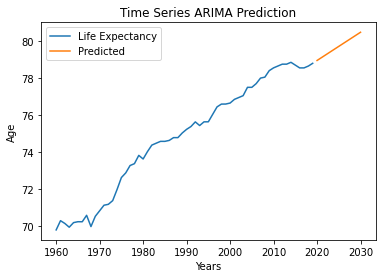

In [ ]:
# Arima Data
ArimaFitLife = pd.concat([life_exp_data,arima_predict],axis = 0)
ArimaFitLife.reset_index(inplace=True)
ArimaFitLife['Years'] = predict_years_df
ArimaFitLife.drop('index', axis=1, inplace = True)
ArimaFitLife.set_index('Years', inplace=True)
ArimaFitLife.columns = ['Life Expectancy', 'Predicted']
ArimaFitLife.plot(title='Time Series ARIMA Prediction', ylabel='Age')

### 5.4.4 Plotting all predictions together

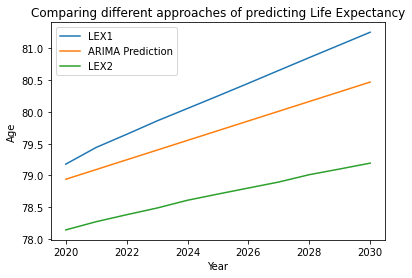

In [ ]:
# Resetting the indices of pre and post pca values
post_pca = predict_post_pca.reset_index(inplace=True, drop=True)
arima_pre = arima_predict.reset_index()

# Creating a joint table with all values
joint_table = pd.concat([predict_post_pca, arima_pre,predict_pre_pca], axis=1)
joint_table['Years'] = np.arange(2020, 2031, 1)
joint_table.set_index('Years', inplace=True)
joint_table.drop('index', axis=1, inplace = True)
joint_table.columns = ['LEX1', 'ARIMA Prediction','LEX2']
joint_table.plot(title='Comparing different approaches of predicting Life Expectancy', xlabel='Year', ylabel='Age')
plt.show()

### 5.4.5 Residuals between Regression from PCA data and Time Series ARIMA Predictions

In [ ]:
# Calculating the Residuals
residual_predict = np.abs( life_exp_predict - np.array(LifeDF['Predicted'][60:]) )
residual_predict = pd.DataFrame(residual_predict)
residual_predict

,0
0,0.237774
1,0.347908
2,0.400874
3,0.459366
4,0.502236
5,0.546209
6,0.592584
7,0.641935
8,0.690513
9,0.736612


In [ ]:
# Creating Residual table
residual_table = pd.concat([predict_post_pca, arima_pre, residual_predict], axis = 1)
residual_table.drop('index',inplace=True, axis=1) #drop index column
residual_table.columns=range(residual_table.columns.size) #reset column index 
residual_table.rename(columns={0:'Project Model with PCA Arima Input Predictions',1:'Arima Predictions',2:'Predictions Difference'},inplace=True) #changing index
residual_table

,Project Model with PCA Arima Input Predictions,Arima Predictions,Predictions Difference
0,79.178410,78.940636,0.237774
1,79.441375,79.093468,0.347908
2,79.647173,79.246299,0.400874
3,79.858496,79.399131,0.459366
4,80.054197,79.551962,0.502236
5,80.251002,79.704793,0.546209
6,80.450209,79.857625,0.592584
7,80.652391,80.010456,0.641935
8,80.853801,80.163288,0.690513
9,81.052731,80.316119,0.736612


In [ ]:
residual_table.to_csv('./misc/predictions_summary.csv') # Output to csv

# 6 Building pipeline for future data

### This is our effort to build an automated pipeline. Due to bespoke data wrangling and analysis, we ran into some difficulties beyond solving our data science problem.

#### For improvement, in the future we can overhaul our methodology with pipeline in mind.

### Below is our proof of concept code

Future data needs to be cleaned and imputed before being fed into the pipeline.<br>
To test the pipeline, the imputed data is reused.

In [ ]:
df_imputed = pd.read_csv('./misc/df_imputed.csv')
X_pipeline = df_imputed.iloc[:, :-1]
y_pipeline = df_imputed.iloc[:, -1]

In [ ]:
# first pipeline to perform PCA on data
pipe_1 = make_pipeline(StandardScaler(), PCA(n_components=7))

# splitting data into training and test data
X_train_pipeline, X_test_pipeline, y_train_pipeline, y_test_pipeline = train_test_split(
    pipe_1.fit_transform(X_pipeline), y, test_size=0.2, random_state=42)

# second pipeline to apply Linear Regression
pipe_2 = make_pipeline(StandardScaler(), LinearRegression())
pipe_2.fit(X_train_pipeline, y_train_pipeline)

# predicting y values 
y_pred_pipeline = pipe_2.predict(X_test_pipeline)

# get model coefficients and intercept
coefs_pipeline = pipe_2[-1].coef_.reshape(7)
intercept_pipeline = pipe_2[-1].intercept_.reshape(1)
print('Model coefficients:', coefs_pipeline)
print('Model intercept:', intercept_pipeline)

# get MSE and coefficient of determination
mse = mean_squared_error(y_test_pipeline, y_pred_pipeline)
print('Mean squared error:', mse)
r2 = r2_score(y_test_pipeline, y_pred_pipeline)
print('R2 score:', r2)

In [ ]:
feature_names = PCAFeatures
temp_df = pd.DataFrame(coefs_pipeline, index=feature_names)
temp_df.sort_values(by=0, inplace=True)

plt.barh(y=temp_df.index, width=temp_df.iloc[:,0])
# plt.xticks(rotation=90)
plt.title('Weightings of PCA features in Linear Regression model')
plt.savefig('chosen-model-features-weighting.png', bbox_inches='tight')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b8e812c-dc7c-4a88-a6cb-a2267f99c5dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>